In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data = pd.read_csv("loan_amount_dataset.csv")
data.head()

,Age,Occupation,Previous_default_%,Day_of_month,Loan_application_%,Interest_rate_%,Payday_indicator,Amount
0,33,1,0,23,10,20,1,100000
1,17,0,30,17,20,20,1,15000
2,21,0,20,8,60,20,0,20000
3,60,2,40,4,70,20,1,40000
4,55,2,30,15,50,20,0,50000


In [51]:
data.describe()

,Age,Occupation,Previous_default_%,Day_of_month,Loan_application_%,Interest_rate_%,Payday_indicator,Amount
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,42.898374,1.231707,39.146341,15.898374,44.634146,20.325203,0.520325,37536.585366
std,16.034715,0.847066,27.787145,9.693772,22.968219,3.112833,0.500605,36172.780991
min,14.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000
25%,22.000000,0.000000,20.000000,6.000000,30.000000,20.000000,0.000000,15000.000000
50%,48.000000,1.500000,30.000000,17.000000,50.000000,20.000000,1.000000,20000.000000
75%,58.000000,2.000000,60.000000,25.000000,70.000000,20.000000,1.000000,50000.000000
max,62.000000,2.000000,100.000000,30.000000,80.000000,60.000000,1.000000,150000.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 246 non-null    int64
 1   Occupation          246 non-null    int64
 2   Previous_default_%  246 non-null    int64
 3   Day_of_month        246 non-null    int64
 4   Loan_application_%  246 non-null    int64
 5   Interest_rate_%     246 non-null    int64
 6   Payday_indicator    246 non-null    int64
 7   Amount              246 non-null    int64
dtypes: int64(8)
memory usage: 15.5 KB


In [53]:
data.value_counts()

Age  Occupation  Previous_default_%  Day_of_month  Loan_application_%  Interest_rate_%  Payday_indicator  Amount
50   1           100                 23            20                  20               1                 0         4
60   2           30                  30            60                  20               1                 40000     3
21   0           20                  21            70                  20               1                 20000     3
17   0           30                  24            30                  20               1                 15000     2
46   2           100                 7             30                  20               0                 0         2
                                                                                                                   ..
45   1           0                   20            0                   20               1                 20000     1
                 10                  23            60        

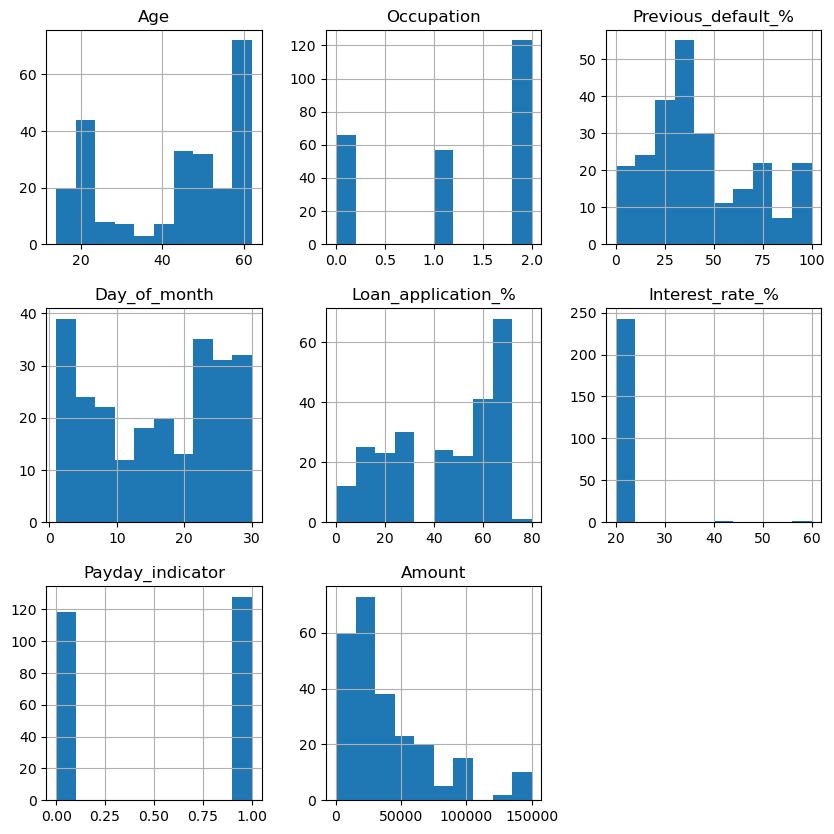

In [54]:
data.hist(figsize=(10,10))
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

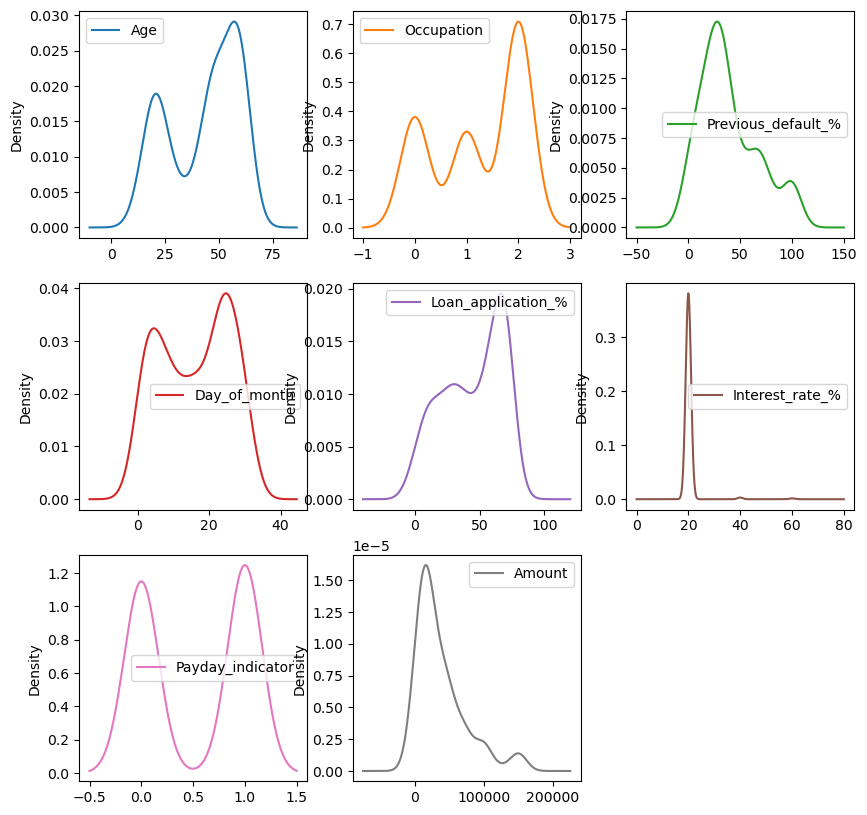

In [55]:
data.plot(kind='density',subplots=True,layout=(3,3),sharex=False,figsize=(10,10))

In [56]:
corr = data.corr()
corr

,Age,Occupation,Previous_default_%,Day_of_month,Loan_application_%,Interest_rate_%,Payday_indicator,Amount
Age,1.000000,0.880425,0.176240,0.059200,0.239850,0.051365,0.063056,0.248967
Occupation,0.880425,1.000000,0.102946,0.019780,0.187733,0.064184,0.003287,0.165368
Previous_default_%,0.176240,0.102946,1.000000,0.023088,0.159712,0.059849,0.064338,-0.555949
Day_of_month,0.059200,0.019780,0.023088,1.000000,0.140018,-0.096291,0.807459,-0.039851
Loan_application_%,0.239850,0.187733,0.159712,0.140018,1.000000,-0.008605,0.108920,-0.007083
Interest_rate_%,0.051365,0.064184,0.059849,-0.096291,-0.008605,1.000000,-0.056645,-0.050855
Payday_indicator,0.063056,0.003287,0.064338,0.807459,0.108920,-0.056645,1.000000,-0.067774
Amount,0.248967,0.165368,-0.555949,-0.039851,-0.007083,-0.050855,-0.067774,1.000000


<Axes: >

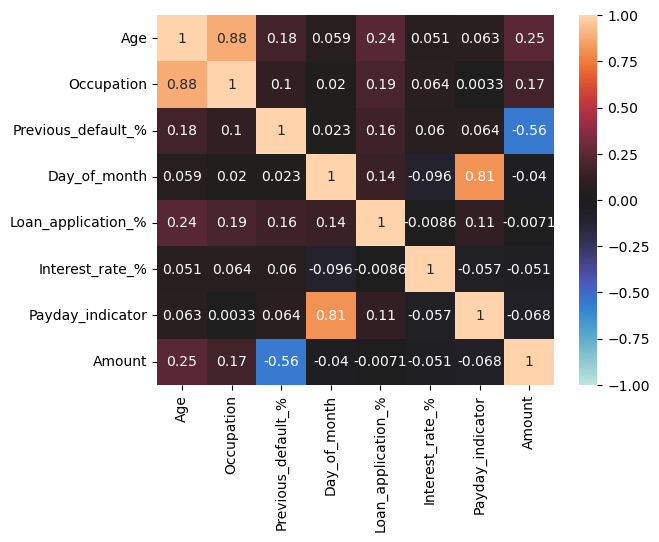

In [57]:
sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

In [58]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [59]:
#scaler = StandardScaler()
#x = scaler.fit_transform(x)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=False)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [63]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [64]:
pred = model.predict(xtest)
pred

array([ 25123.11042056,  19970.04415043, -10130.43049578,  57907.0203468 ,
        59481.20580016,  -4660.74772867,  19970.04415043,   6542.96879581,
        29007.40020864,  34322.95977582,  32926.29204943,  40492.05487277,
        39696.1096583 ,   7492.17351272,  64668.68767807,  67047.39215616,
        64272.78840834,  69177.41563918,  49329.7485741 ,  19615.78549581,
        61824.16366606,  -5819.00898413,    166.92389144,  45204.00394573,
         7492.17351272,  65638.10315376,  30989.81811919,  67737.89302204,
        54801.0406121 ,   6542.96879581,  77467.34782273,  57425.50018945,
        41299.2349463 ,  56717.59844451,  36195.58772217,  70198.79294374,
        55370.30014247,  29764.098064  ,  65630.49686416,  44399.6707516 ,
         2472.88323279,  34463.14458679,  51949.27978635,   3318.45663424,
        65638.10315376,   5989.66334862,   1286.58267801,   2980.1520628 ,
        51385.56418539,  23329.07380619])

In [65]:
score = r2_score(ytest,pred)
score

0.4163802226573081

In [34]:
import joblib

In [35]:
joblib.dump(model,"amount_prediction_model")

['amount_prediction_model']

In [36]:
model = joblib.load("amount_prediction_model")
model.predict([[18,0,40,16,0,20,1]])

C:\Users\KRITEX\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13656.15471647])